In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt

from src.data.apogee import APOGEE_DATA

# Get Real Data

In [3]:
Data = APOGEE_DATA(filename='../src/data/allVisit-1.4-apo25m.fits')

apogee_id = '2M14060352+5305489'
times_mjd, radial_velocity, radial_velocity_error = Data.getRadialVelocity(apogee_id=apogee_id)
times_mjd, radial_velocity, radial_velocity_error = jnp.array(times_mjd), jnp.array(radial_velocity), jnp.array(radial_velocity_error)

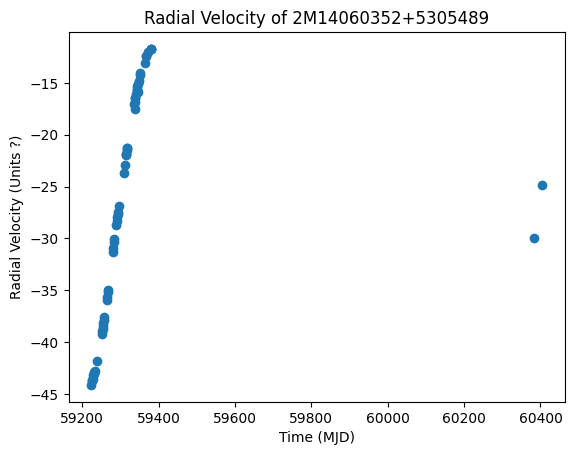

In [8]:
plt.scatter(times_mjd, radial_velocity)
plt.xlabel('Time (MJD)')
plt.ylabel('Radial Velocity (Units ?)')
plt.title('Radial Velocity of ' + apogee_id)
plt.show()

In [23]:
times_seconds =  (times_mjd - times_mjd.min()) * 86400
times_seconds

Array([102038400, 100224000,   9936000,  10022400,  12960000,   5184000,
        10540800,   8035200,   7862400,  11145600,   3888000,  10022400,
         8208000,   2764800,   2937600,   2505600,   6134400,   9763200,
         3628800,   9849600,  10368000,  13478400,   2592000,         0,
         1296000,   6048000,   7603200,    172800,  10800000,   7948800,
          777600,    345600,    604800,  12355200,   5270400,   5702400,
         2678400,    259200,   4924800,   7948800,  10195200,  10454400,
          518400,  13564800,   5875200,   2851200,  10281600,   8121600,
         3542400,  11059200,  12441600,  13651200,  10713600,   3801600,
         7344000,  12096000,    691200,   5011200,   6307200,   2419200,
         5961600,   7776000], dtype=int64)

# Likelihood of Radial Velocities

In [15]:
radial_velocity_error

Array([0.2894377 , 0.27549377, 0.13342991, 0.11306085, 0.06905981,
       0.17681322, 0.10368311, 1.5295473 , 0.07392159, 0.09116578,
       0.08261801, 0.07766867, 0.07621671, 0.12354864, 0.10627155,
       0.10146664, 0.15644634, 0.11200351, 0.0986087 , 0.07466043,
       0.10000829, 0.12555936, 0.09145084, 0.13779724, 0.0824692 ,
       0.11326265, 0.07449653, 0.09692411, 0.12120783, 0.08369293,
       0.05408278, 0.07503295, 0.06919576, 0.10037524, 0.11160115,
       0.11639911, 0.09301807, 0.06981166, 0.0986779 , 0.07077744,
       0.10041747, 0.08258408, 0.08313985, 0.11632276, 0.11037798,
       0.1053287 , 0.0826231 , 0.09956001, 0.09063673, 0.08485847,
       0.08856864, 0.07070241, 0.09260528, 0.33931044, 0.07287458,
       0.0868383 , 0.06985564, 0.3382601 , 0.1136953 , 0.17817062,
       0.08452537,        nan], dtype=float64)

In [ ]:
likelihood = Likelihood(times=times_seconds, 
                        observed_data=radial_velocity, 
                        uncertainity=radial_velocity_error)

# period, eccentricity, omega, phi0, K, v0
params = jnp.array([2.0, 1.1, 0.1, 2.0, 1.0, 1.0])
likelihood.velocity_model(params)

NameError: name 'Likelihood' is not defined